# Clustering

External Sources Used:

 https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

  https://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-clusters-in-a-k-means-unsupervised-learning-model/

 https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering


# Details

The purpose of this task is to cluster drug users using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


The dataset is part of "Drug consumption". More information here: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#. The class attribute has been transformed into a binary classification where '0' indicates NOUSER and '1' indicates USER.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [30]:
# Import required Python packages here
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.metrics import confusion_matrix

##  K-Means Clustering

## Determining “k” value from the elbow method

In this task, elbow method has been used to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So the goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, the elbow method has been performed for k from 1 to 10 and a line chart of the SSE has been plot for each value of k, and determined the best k (the number of clusters). 

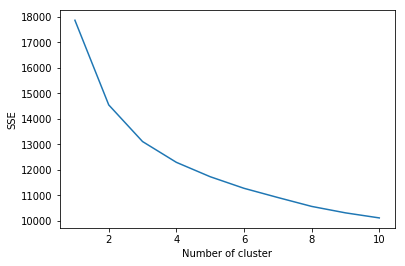

 The best K is 3. As it is clear from the plot, elbow is formed at 3, so 3 is the optimal number of clusters for drug_users dataset.


In [31]:
####Loading the dataset into the dataframe
ds = pd.read_csv('drug_users.csv')

#defining data and target 
data = ds[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
target = ds[['CLASS']]

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ds)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
print(' The best K is 3. As it is clear from the plot, elbow is formed at 3, so 3 is the optimal number of clusters for drug_users dataset.')


###  Visualization for K-Means Clustering

In this task, k-means clustering has been performed for k=2 and visualized the predicted training samples and actual training samples on scatter plots. Used 70% of the dataset for training and 30% of the dataset for testing. Performed kmeans for clustering samples in the training set. 

Used two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since the dataset has multiple features(dimensions),data has been visualized with the help of  one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. 

In [36]:
#Spliting the dataset 70% for training and 30% for testing

#Defining data and target 
data = ds[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
target = ds[['CLASS']]


from sklearn.model_selection import train_test_split
x = data
y = target
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0,stratify= y)

###################end code for Task 1-b-1

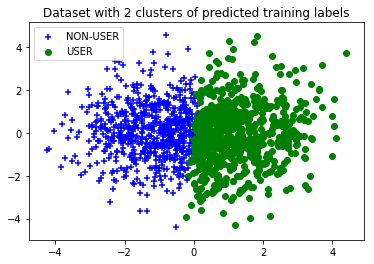

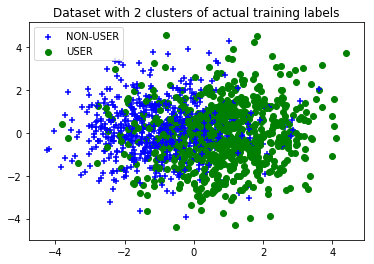

In [53]:
#Visualizing the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans_x = KMeans(n_clusters=2,random_state=0)
kmeans_x.fit(x_train)

# Compute cluster centers and predict cluster index for each sample 
kmean_x_train = kmeans_x.predict(x_train)

# Model and fit the data to the PCA model

X_train_pca = PCA(n_components=2).fit(x_train)

pca_2d = X_train_pca.transform(x_train)

# Visualize the predicted training labels vs actual training labels. 

#Visualizing the predicted training labels
for i in range(0, pca_2d.shape[0]):
 if kmean_x_train[i] == 0:
  c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='+')
 else :
  c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')

pl.legend([c1, c2], ['NON-USER', 'USER'])
pl.title('Dataset with 2 clusters of predicted training labels')
pl.show()

#Visualizing the actual training labels
for i in range(0, pca_2d.shape[0]):
 if y_train.reset_index().CLASS[i] == 0:
  c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
 else :
  c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')

pl.legend([c1, c2], ['NON-USER', 'USER'])
pl.title('Dataset with 2 clusters of actual training labels')
pl.show()



###################end code for Task 1-b-2

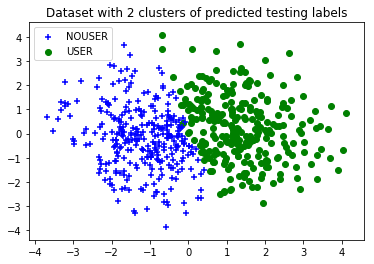

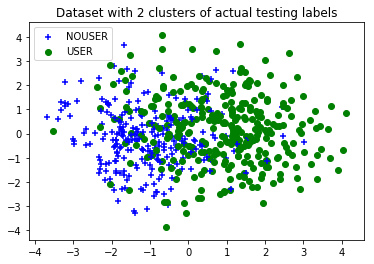

In [38]:
#Visualizing the predicted testing labels vs actual testing labels


# predicting cluster index for each sample 
kmeans_xtest = kmeans_x.predict(x_test)


# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit(x_test)
pca_xtest_2d = X_test_pca.transform(x_test)

# Visualizing the predicted testing labels vs actual testing labels. 


# Visualizing the predicted testing labels
for i in range(0, pca_xtest_2d.shape[0]):
 if kmeans_xtest[i] == 0:
  c1 = pl.scatter(pca_xtest_2d[i,0],pca_xtest_2d[i,1],c='b',marker='+')
 elif kmeans_xtest[i] == 1:
  c2 = pl.scatter(pca_xtest_2d[i,0],pca_xtest_2d[i,1],c='g',marker='o')

pl.legend([c1, c2], ['NOUSER', 'USER'])
pl.title('Dataset with 2 clusters of predicted testing labels')
pl.show()

# Visualizing the actual testing labels
for i in range(0, pca_xtest_2d.shape[0]):
 if y_test.reset_index().CLASS[i] == 0:
  c1 = pl.scatter(pca_xtest_2d[i,0],pca_xtest_2d[i,1],c='b',marker='+')
 else:
  c2 = pl.scatter(pca_xtest_2d[i,0],pca_xtest_2d[i,1],c='g',marker='o')

pl.legend([c1, c2], ['NOUSER', 'USER'])
pl.title('Dataset with 2 clusters of actual testing labels')
pl.show()



# Hierarchical Agglomerative  Clustering

## Finding the best Hierarchical Agglomerative Clustering Model

In this task, Hierarchical Agglomerative clustering has been performed with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Used F1 score for evaluation and took n_clusters = 2.


In [55]:
# Importing AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Importing pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Importing f1_score
from sklearn.metrics import f1_score

## Calculating pairwise distance matrix for X_train
pdm_train_m = pairwise_distances(x_train, metric='manhattan')
pdm_train_c = pairwise_distances(x_train, metric='cosine')
pdm_train_e = pairwise_distances(x_train, metric='euclidean')

## Modelling and fitting the training data to the AgglomerativeClustering model

## complete linkage + cosine
comp_cos = AgglomerativeClustering(affinity = 'cosine', linkage = 'complete', n_clusters = 2).fit_predict(pdm_train_c)


## complete linkage + euclidean
comp_euc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'complete', n_clusters = 2).fit_predict(pdm_train_e)



## complete linkage + manhattan
comp_man = AgglomerativeClustering(affinity = 'manhattan', linkage = 'complete', n_clusters = 2).fit_predict(pdm_train_m)


## average linkage + cosine
avg_cos = AgglomerativeClustering(affinity = 'cosine', linkage = 'average', n_clusters = 2).fit_predict(pdm_train_c)


## average linkage + euclidean
avg_euc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'average', n_clusters = 2).fit_predict(pdm_train_e)


## average linkage + manhattan
avg_man = AgglomerativeClustering(affinity = 'manhattan', linkage = 'average', n_clusters = 2).fit_predict(pdm_train_m)

print("F1-score for complete linkage + cosine", f1_score(y_train, comp_cos))
print("F1-score for complete linkage + euclidean", f1_score(y_train, comp_euc))
print("F1-score for complete linkage + manhattan", f1_score(y_train, comp_man))
print("F1-score for average linkage + cosine", f1_score(y_train, avg_cos))
print("F1-score for average linkage + euclidean", f1_score(y_train, avg_euc))
print("F1-score for average linkage + manhattan", f1_score(y_train, avg_man))


C:\Users\anil123cil\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


F1-score for complete linkage + cosine 0.2616154395997141
F1-score for complete linkage + euclidean 0.08322496749024706
F1-score for complete linkage + manhattan 0.6713437668645439
F1-score for average linkage + cosine 0.28715003589375443
F1-score for average linkage + euclidean 0.0
F1-score for average linkage + manhattan 0.11508951406649616


# Visualization for Hierarchical Agglomerative Clustering

Found the best performed model from the previous step and used that model for visualizing the predicted training samples and actual training samples on scatter plots. Used PCA model for visualizing the data

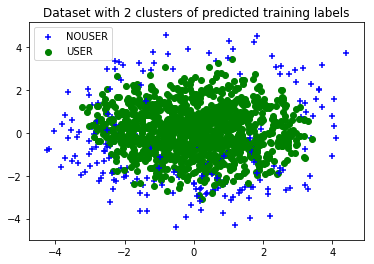

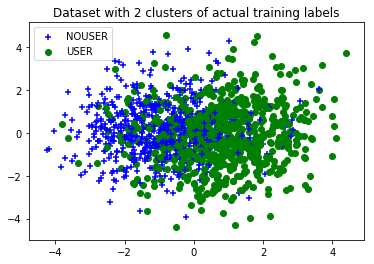

In [62]:
#Visualizing the predicted training labels vs actual training labels
X_train_pca = PCA(n_components=2).fit(x_train)
pca_2d = X_train_pca.transform(x_train)

# Visualize the predicted training labels versus actual training labels. 

#Visualizing the predicted training labels
pred = comp_man   # complete + manhattan gives the best model
for i in range(0, pca_2d.shape[0]):
 if pred[i] == 0:
  c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
 else :
  c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')

pl.legend([c1, c2], ['NOUSER', 'USER'])
pl.title('Dataset with 2 clusters of predicted training labels')
pl.show()

#Visualizing the actual training labels
for i in range(0, pca_2d.shape[0]):
 if y_train.reset_index().CLASS[i] == 0:
  c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
 else :
  c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')

pl.legend([c1, c2], ['NOUSER', 'USER'])
pl.title('Dataset with 2 clusters of actual training labels')
pl.show()

# Comparing K-Means Clustering and Hierarchical Agglomerative Clustering

## Visualizing Clusters 

In this task, used whole dataset for training k-means cluster and hierarchical agglomerative clustering. Used the best model for agglomerative clustering. Visualized the predicted labels from k-means clustering and agglomerative clustering versus actual labels.

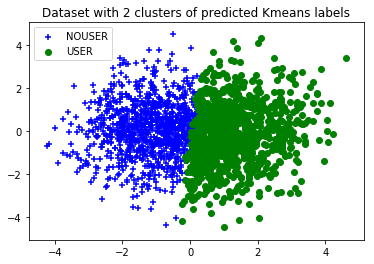

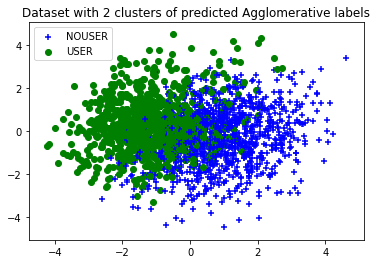

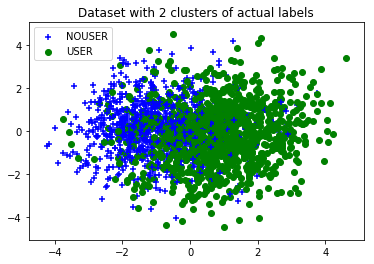

In [67]:
## Visualizing the predicted training labels vs actual training labels
# Importing AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Importing pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Importing f1_score
from sklearn.metrics import f1_score
### Kmeans Clustering
# Modelling and fitting the data to the Kmeans 
km = KMeans(n_clusters=2)
km3 = km.fit_predict(x)

### Agglomerative Clustering
# Calculating pairwise distance matrix for X
pdm_m = pairwise_distances(x, metric='manhattan')


# Modelling and fitting the data to the Agglomerative 
Agg_x = AgglomerativeClustering(n_clusters=2, affinity = 'manhattan', linkage = 'complete').fit_predict(x)


### Visualize Clusters
#  Modelling and fitting the data to the PCA model
X_pca = PCA(n_components=2).fit(x)
pca_2d = X_pca.transform(x)

# Visualizing the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

#Visualizing the predicted Kmeans labels
for i in range(0, pca_2d.shape[0]):
 if km3[i] == 0:
  c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
 else :
  c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')

pl.legend([c1, c2], ['NOUSER', 'USER'])
pl.title('Dataset with 2 clusters of predicted Kmeans labels')
pl.show()

#Visualizing the predicted Agglomerative labels
for i in range(0, pca_2d.shape[0]):
 if Agg_x[i] == 0:
  c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
 else :
  c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')

pl.legend([c1, c2], ['NOUSER', 'USER'])
pl.title('Dataset with 2 clusters of predicted Agglomerative labels')
pl.show()

# Visualizing the actual labels
for i in range(0, pca_2d.shape[0]):
 if y.CLASS[i] == 0:
  c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
 else :
  c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')

pl.legend([c1, c2], ['NOUSER', 'USER'])
pl.title('Dataset with 2 clusters of actual labels')
pl.show()

##  Comparing K-Means Clustering &  Hierarchical Agglomerative Clustering

Printing out confusion matrices for kmeans and agglomerative clustering. Also, comparing precision, recall, and F1-score for both model.

In [70]:
from sklearn.metrics import classification_report

# Confusion Matrix for Kmeans
print("Confusion matrix for Kmeans clustering")
print(confusion_matrix(y, km3))

# Confusion Matrix for Agglomerative Clustering
print("Confusion matrix for Agglomerative clustering")
print(confusion_matrix(y, Agg_x))


# Classification Report for KMeans
print("Classification report for Kmeans clustering")
target_names = ['class 0', 'class 1']
print(classification_report(y, km3, target_names = target_names)) 

# Classification Report for Agglomerative Clustering
print("Classification report for Agglomerative clustering")
print(classification_report(y, Agg_x, target_names = target_names)) 

print("As we can see that precision, recall and f1-score for KMeans Clustering are much higher than Agglomerative clustering")

Confusion matrix for Kmeans clustering
[[683 157]
 [272 773]]
Confusion matrix for Agglomerative clustering
[[200 640]
 [797 248]]
Classification report for Kmeans clustering
             precision    recall  f1-score   support

    class 0       0.72      0.81      0.76       840
    class 1       0.83      0.74      0.78      1045

avg / total       0.78      0.77      0.77      1885

Classification report for Agglomerative clustering
             precision    recall  f1-score   support

    class 0       0.20      0.24      0.22       840
    class 1       0.28      0.24      0.26      1045

avg / total       0.24      0.24      0.24      1885

As we can see that precision, recall and f1-score for KMeans Clustering are much higher than Agglomerative clustering
